In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
sns.set()

In [2]:
np.random.randint(100)

52

In [3]:
pop_mean=50
percent=0.05
flaglimit=20
llimit=pop_mean-pop_mean*percent
ulimit=pop_mean+pop_mean*percent

In [4]:
index,rand,mean=[],[],[]
i=0
flag=flaglimit
while True:
    index.append(i)
    rand.append(np.random.randint(100))
    mean.append(np.mean(rand))
    if np.mean(rand) < ulimit and np.mean(rand) > llimit:
        flag-=1
    else:
        flag=flaglimit
    if flag==0:
        break
    i+=1
df=pd.DataFrame({"index":index,"RandomNumber":rand,"CummulativeMean":mean})
df.head(10)

,index,RandomNumber,CummulativeMean
0,0,86,86.000000
1,1,52,69.000000
2,2,32,56.666667
3,3,95,66.250000
4,4,84,69.800000
5,5,90,73.166667
6,6,53,70.285714
7,7,91,72.875000
8,8,97,75.555556
9,9,18,69.800000


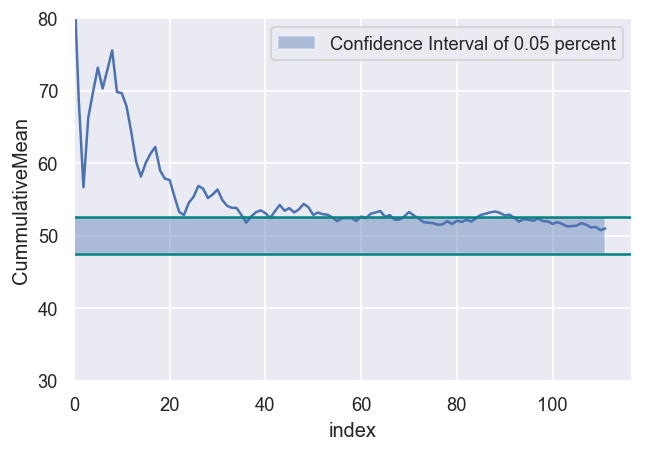

In [5]:
plt.figure(dpi=120)
sns.lineplot(x="index",y="CummulativeMean",data=df)
plt.axhline(y=llimit, linewidth=1.5, c='teal')
plt.axhline(y=ulimit, linewidth=1.5, c='teal')
plt.fill_between(df["index"],llimit,ulimit,alpha=0.4,
                 label="Confidence Interval of "+str(percent)+ " percent")
plt.ylim([30,80])
plt.xlim(left=0)
plt.legend()
plt.show()

In [8]:
trial,steps=[],[]
for j in tqdm(np.arange(1000)):
    index,rand,mean=[],[],[]
    i=0
    flag=flaglimit
    while True:
        index.append(i)
        rand.append(np.random.randint(100))
        mean.append(np.mean(rand))
        if np.mean(rand) < ulimit and np.mean(rand) > llimit:
            flag-=1
        else:
            flag=flaglimit
        if flag==0:
            break
        i+=1
    trial.append(j)
    steps.append(i)
df1=pd.DataFrame({"trials":trial,"stepsTaken":steps})

100%|█████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 81.66it/s]


In [9]:
df1.head()

,trials,stepsTaken
0,0,224
1,1,898
2,2,91
3,3,83
4,4,105


D:\bharath\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


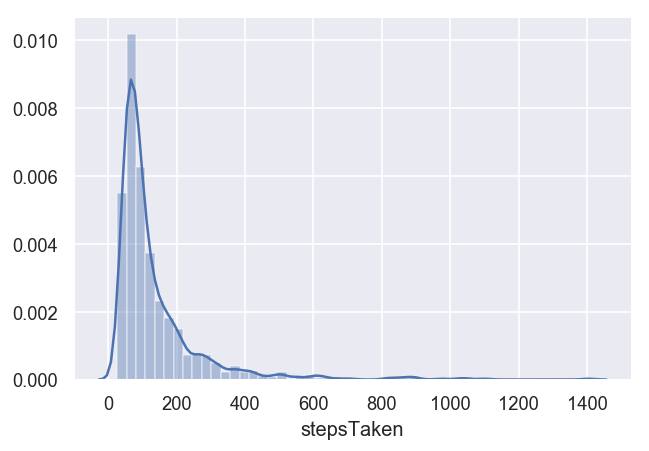

In [12]:
plt.figure(dpi=120)
sns.distplot(df1["stepsTaken"])
plt.show()